In [27]:
%pip install numpy pandas matplotlib seaborn mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\daniu\my_repos\jupyter-notebooks\input-dir\placement_data_full_class.csv")

In [6]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['status'])
print(le.classes_)
df['status_binary'] = le.transform(df['status'])

['Not Placed' 'Placed']


In [15]:
le = LabelEncoder()
le.fit(df['gender'])
print(le.classes_)
df['gender_binary'] = le.transform(df['gender'])

['F' 'M']


In [16]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,status_binary,gender_binary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1


<Axes: xlabel='etest_p', ylabel='ssc_p'>

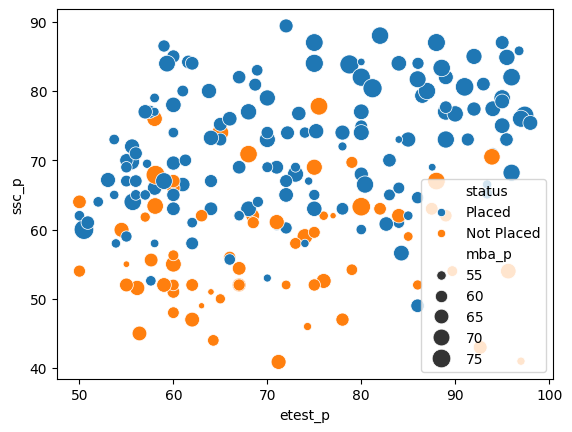

In [13]:
sns.scatterplot(x=df['etest_p'], y=df['ssc_p'], hue=df['status'],
                size=df['mba_p'],
    sizes=(20, 200)
                )

In [25]:
from sklearn.model_selection import train_test_split

df = df[['gender_binary', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status_binary']]

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(train_set.shape, test_set.shape)
X_train, y_train, X_test, y_test = train_set.drop('status_binary', axis=1), train_set['status_binary'], test_set.drop('status_binary', axis=1), test_set['status_binary']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(172, 7) (43, 7)
(172, 6) (172,) (43, 6) (43,)


In [ ]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(X_train, y_train)
print(p.coef_, p.intercept_)

[[   -3.     874.59   562.35   217.5   -214.53 -1262.16]] [-33.]


In [31]:
from sklearn.metrics import accuracy_score

y_pred = p.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.7674418604651163
